### Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importing Data

In [2]:
raw_data=pd.read_csv("/content/Bengaluru_House_Data.csv",encoding="latin-1")
raw_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07,NaN,NaN,NaN,NaN
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00,NaN,NaN,NaN,NaN
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00,NaN,NaN,NaN,NaN
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00,NaN,NaN,NaN,NaN
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00,NaN,NaN,NaN,NaN


In [3]:
# getting the shape of data
raw_data.shape

(13320, 13)

In [4]:
# getting list of columns
raw_data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

### Basic Data cleaning

In [5]:
# Dropping unwanted columns
data=raw_data.drop(columns=['Unnamed: 9', 'Unnamed: 10','Unnamed: 11', 'Unnamed: 12'])

In [6]:
# Finding duplicate rows
data.duplicated().sum()

511

In [7]:
# Duplicate rows
data[data.duplicated()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.5
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1194,2.0,2.0,47
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44
...,...,...,...,...,...,...,...,...,...
13285,Super built-up Area,Ready To Move,VHBCS Layout,2 BHK,OlarkLa,1353,2.0,2.0,110
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0,154.5
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57


In [8]:
# Dropping duplicate rows
data.drop_duplicates(inplace=True)

In [9]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


In [10]:
data.shape

(12809, 9)

### Exploratory Data Analysis

In [11]:
# Basic info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12809 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12809 non-null  object 
 1   availability  12809 non-null  object 
 2   location      12808 non-null  object 
 3   size          12793 non-null  object 
 4   society       7474 non-null   object 
 5   total_sqft    12809 non-null  object 
 6   bath          12736 non-null  float64
 7   balcony       12204 non-null  float64
 8   price         12809 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1000.7+ KB


##### Inference

1. There are 7 categorical columns and 2 numerical columns.
2. Among these 7 categorical columns "total_sqft" and "price" are numericals by nature, others can be converted into numericals.
3. There are null values in the data.

In [12]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5335
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

##### Inference

1. There are 5 columns with null values.
2. There is only 1 null value in "location" column and 16 null values in the "size" column, these rows can be dropped if no specific/special information is found.
3. Null values in other columns must be imputed.

Next step is to look for outliers, but before that categorical columns which can be converted into numericals without encoding are converted to numbers.

### Basic Feature Engineering

#### Price

In [13]:
pd.set_option('display.max_rows', None)

In [14]:
pd.Series(data["price"].unique())

0          $39.07 
1         $120.00 
2          $62.00 
3          $95.00 
4          $51.00 
5          $38.00 
6         $204.00 
7         $600.00 
8          $63.25 
9         $370.00 
10         $70.00 
11        $295.00 
12         $40.00 
13        148-150 
14         $73.50 
15         $48.00 
16         $60.00 
17        $290.00 
18         $15.00 
19        $122.00 
20        $380.00 
21        $103.00 
22       25.25-30 
23              56
24            23.1
25              81
26           48.77
27              47
28             186
29              35
30             123
31           57.39
32             125
33              36
34            45.5
35           56.12
36              45
37              38
38              48
39           91.79
40             200
41              33
42           94.82
43             130
44              50
45              99
46              91
47              75
48              44
49             192
50             185
51             150
52          

In [15]:
pd.reset_option('display.max_rows')

##### Inference

1. The prices are in different format such as
<br>  i) $price
 <br> ii)price range (a-b)
 <br> iii)? price
 <br> iv)special character price
 <br> v) price

In [16]:
data["price"].nunique()

2205

In [17]:
data.iloc[87]

area_type       Super built-up  Area
availability                  17-Sep
location                  Dasanapura
size                           2 BHK
society                      Tavenew
total_sqft                       708
bath                             2.0
balcony                          2.0
price                       ? 37.00 
Name: 87, dtype: object

In [18]:
data.iloc[2922]

area_type       Super built-up  Area
availability                  18-Aug
location             Electronic City
size                           2 BHK
society                      Prarkun
total_sqft                      1128
bath                             2.0
balcony                          1.0
price                          65.35
Name: 2948, dtype: object

In [19]:
data["price"].sample(n=15)

3841        166
7657        750
2068        105
5857         43
11861        75
5676      67.23
9027        105
10817        62
6719     28.545
4703       68.8
12047      58.5
4726         37
8123         80
4236         85
2258      69.61
Name: price, dtype: object

In [20]:
pd.Series(data["price"].unique()).sample(n=100)

719            830
724          40.25
841           42.2
1862         32.99
654          314.5
           ...    
75       ? 210.00 
1067         93.34
708          45.95
1929         45.51
1260         19.33
Length: 100, dtype: object

In [21]:
pd.Series(data["price"].unique()).sample(n=50)

202       ? 73.95 
2112          51.8
461          64.44
2078         70.67
27              47
1941         153.5
1624         79.15
900          65.35
1227           258
1619         53.87
1582         237.5
35           56.12
1686           455
391          98.88
641          93.93
32             125
1522       68.62 
801          58.39
1335          41.2
1371         40.47
1189         40.95
38              48
481           44.5
376            159
374           98.5
945           59.1
2155         30.12
34            45.5
2156           680
876         28.785
856          44.95
173       ? 72.00 
1815           821
1440         41.51
1169           156
601             10
2017         42.66
1327         54.24
1628         58.58
86        ? 48.00 
1771         69.45
733          59.01
432          27.24
2168         78.19
1230         61.37
449         43.415
1292         34.56
940          92.66
1599          51.2
1459      183.00 
dtype: object

In [22]:
data["price"].sample(n=50)

12981          110
10299           45
7769         79.15
105       ? 49.90 
430             69
1513            39
8654           157
5906            55
8269            72
7158            85
9877           112
9375            62
10116           28
3931          45.5
8313           100
5455         47.88
5186           258
4163            88
8979            68
5890            49
12196           22
767             90
179       ? 36.00 
94        ? 80.00 
7692           170
11566         35.4
10560          245
6467            37
4231            65
6790            99
3197           160
5352            52
10229          135
13281          125
10564          161
12253          123
344          21.53
6703            58
9271            95
5070            70
4249           180
3274            35
6286         46.13
12361         25.4
11342           60
8147           100
4637            85
10968        52.76
4868            55
6066            65
Name: price, dtype: object

In [23]:
data.loc[6852]

area_type       Super built-up  Area
availability           Ready To Move
location                  Begur Road
size                           2 BHK
society                      Dhalsh 
total_sqft                      1200
bath                             2.0
balcony                          2.0
price                        45.60 
Name: 6852, dtype: object

In [24]:
data.loc[6852]["price"]

' \x80 45.60 '

Replacing special character with empty string

In [25]:
data.loc[6852]["price"].replace("\x80","")

'  45.60 '

In [26]:
# converting different format of price to numbers

def price_transform(raw_price):
  if "$" in raw_price:
    price=raw_price.replace("$","")
  elif "?" in raw_price:
    price=raw_price.replace("?","")
  elif "-" in raw_price:
    temp=raw_price.split("-")
    price=str((float(temp[0].strip())+float(temp[1].strip()))/2)
  elif raw_price.isprintable():
    price=raw_price
  else:
    price=raw_price.replace("\x80","")
    price=str(float(price.strip())*1.12)

  return float(price.strip())

In [27]:
data["price"]=data["price"].apply(price_transform)

#### Size

In [28]:
data["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [29]:
data[data["size"]=="1 RK"]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
24,Super built-up Area,18-Nov,Thanisandra,1 RK,Bhe 2ko,510,1.0,0.0,27.625
782,Super built-up Area,Ready To Move,Thanisandra,1 RK,Bhmesy,445,1.0,0.0,28.000
1363,Super built-up Area,21-Nov,Thanisandra,1 RK,Bhe 2ko,510,1.0,1.0,25.250
2486,Super built-up Area,19-Dec,Bhoganhalli,1 RK,Rosha I,296,1.0,0.0,22.890
2557,Built-up Area,Ready To Move,Anekal,1 RK,NaN,351,1.0,1.0,16.000
2788,Super built-up Area,20-Aug,Rachenahalli,1 RK,AsNowre,440,1.0,0.0,28.000
4876,Built-up Area,Ready To Move,Electronic City,1 RK,GMown E,435,1.0,1.0,19.500
5079,Built-up Area,17-Jun,Whitefield,1 RK,Prtates,905,1.0,1.0,52.000
5285,Super built-up Area,18-May,Rachenahalli,1 RK,AsNowre,385 - 440,1.0,0.0,19.800
6586,Super built-up Area,Ready To Move,Electronics City Phase 1,1 RK,NaN,360,1.0,0.0,16.900


In [30]:
data[data["size"]=="1 BHK"]["total_sqft"].unique()

array(['600', '450', '705', '589', '645', '525', '630', '500', '530',
       '451', '34.46Sq. Meter', '375', '1200', '595', '715', '416', '834',
       '711', '469', '750', '425', '667', '1000Sq. Meter', '650',
       '520 - 645', '930', '686', '1300', '400', '650 - 665', '633 - 666',
       '665', '15', '950', '700', '697', '710', '565', '485', '680',
       '785', '440', '764', '340', '628', '580 - 650', '520', '551',
       '654', '660 - 670', '620 - 933', '1050', '884', '640', '688',
       '765', '671', '581.91', '360', '670 - 980', '825', '515',
       '645 - 936', '668', '960', '395', '605', '714', '596 - 804', '693',
       '674', '590', '760', '606', '527', '660', '730', '890', '734',
       '794', '1351', '648', '905', '900', '613 - 648', '615', '460',
       '673', '664', '685', '2400', '923', '420', '596', '910', '532',
       '550', '350', '835', '703', '965', '1500', '813', '735',
       '381 - 535', '524 - 894', '607', '540 - 670', '656', '620', '833',
       '669', '708

In [31]:
data[data["size"]=="1 RK"]["price"].median()

27.0

In [32]:
data[data["size"]=="1 BHK"]["price"].median()

32.64

Hall and Kitchen is available in all house so the numbers in the field represents the number of bedrooms, so its better to extract only the numbers.

And the 1 RK house represent 1 room and kitchen which is not equivalent to 1 BHK so its converted to 0.5 BHK

In [33]:
data.loc[data["size"]=="1 RK","size"]="0.5 BHK"

In [34]:
data["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '0.5 BHK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [35]:
data["size"]=data["size"].str.split().str[0]

In [36]:
data["size"]=data["size"].astype("float")

#### Total sqft

In [37]:
data["total_sqft"].nunique()

2117

In [38]:
pd.set_option('display.max_rows',None)

In [39]:
pd.Series(data["total_sqft"].unique())

0                    1056
1                    2600
2                    1440
3                    1521
4                    1200
5                    1170
6                    2732
7                    3300
8                    1310
9                    1020
10                   1800
11                   2785
12                   1000
13                   1100
14                   2250
15                   1175
16                   1180
17                   1540
18                   2770
19                    600
20                   1755
21                   2800
22                   1767
23                    510
24                   1250
25                    660
26                   1610
27                   1151
28                   1025
29            2100 - 2850
30                   1075
31                   1760
32                   1693
33                   1925
34                    700
35                   1070
36                   1724
37                   1290
38          

In [40]:
pd.reset_option('display.max_rows')

##### Inference

1. The "total_sqft" column has different format
<br> i)sqft
<br>ii)Sq. Meter
<br>iii)Acres
<br>iv)Sq. Yards
<br>v)Cents
<br>vi)Guntha
<br>vii) Perch
<br>viii)Grounds
<br>iX) sqft range

In [41]:
def sqft_transform(raw_sqft):
  if "Meter" in raw_sqft:
    sqft=float(raw_sqft[0:-9])*10.7639
  elif "Yards" in raw_sqft:
    sqft=float(raw_sqft[0:-9])*9
  elif "Cents" in raw_sqft:
    sqft=float(raw_sqft[0:-5])*435.56
  elif "Guntha" in raw_sqft:
    sqft=float(raw_sqft[0:-6])*1089
  elif "Perch" in raw_sqft:
    sqft=float(raw_sqft[0:-5])*272.25
  elif "Grounds" in raw_sqft:
    sqft=float(raw_sqft[0:-7])*2400.35
  elif "Acres" in raw_sqft:
    sqft=float(raw_sqft[0:-5])*43560
  elif "-" in raw_sqft:
    temp=raw_sqft.split("-")
    sqft=(float(temp[0].strip())+float(temp[1].strip()))/2
  else:
    sqft=float(raw_sqft)
  return sqft

In [42]:
data["total_sqft"]=data["total_sqft"].apply(sqft_transform)

#### Availability

Calculating number of days from today

In [43]:
data["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [44]:
from datetime import datetime
year=datetime.now().year

In [45]:
today=pd.to_datetime(datetime.today())
def availability_transform(date):
  if date not in ['Ready To Move','Immediate Possession']:
    day=pd.to_datetime(date+"-"+str(year),format="%d-%b-%Y")
    no_of_days=(today-day).days
  else:
    no_of_days=0
  if no_of_days<0:
    no_of_days=365+no_of_days
  return no_of_days

In [46]:
data["availability"]=data["availability"].apply(availability_transform)

In [47]:
data["availability"].unique()

array([210,   0,  60, 149, 241, 209, 273, 208, 301, 300, 121, 147,  90,
       331, 272, 120, 303, 211, 334,  89,  29, 207, 176, 333, 179, 364,
        26,  58, 332, 302,  61,  30,  57, 180, 119, 212, 123,  28,  25,
       363, 146,  59, 242, 270,  27, 148, 269, 177, 122,  91,  56, 271,
       361, 238, 118, 213, 117, 178, 299, 330, 245, 240, 244,   1,  32,
       150, 239, 362, 304, 275, 214, 274, 237, 336, 181, 243,  88, 182,
         3])

Feature Engineering is performed on all categorical columns with numerical values.

Now, Back to EDA.

Outliers can be checked for numerical columns

In [48]:
data.describe()

,availability,size,total_sqft,bath,balcony,price
count,12809.000000,12793.000000,1.280900e+04,12736.000000,12204.000000,12809.000000
mean,36.337185,2.816423,1.934977e+03,2.707522,1.582022,117.547812
std,85.495061,1.312140,1.761739e+04,1.357193,0.822275,402.068267
min,0.000000,0.500000,1.000000e+00,1.000000,0.000000,8.000000
25%,0.000000,2.000000,1.100000e+03,2.000000,1.000000,50.000000
50%,0.000000,3.000000,1.282000e+03,2.000000,2.000000,73.000000
75%,0.000000,3.000000,1.693000e+03,3.000000,2.000000,121.000000
max,364.000000,43.000000,1.306800e+06,40.000000,3.000000,42278.000000


#### Dealing with Outliers

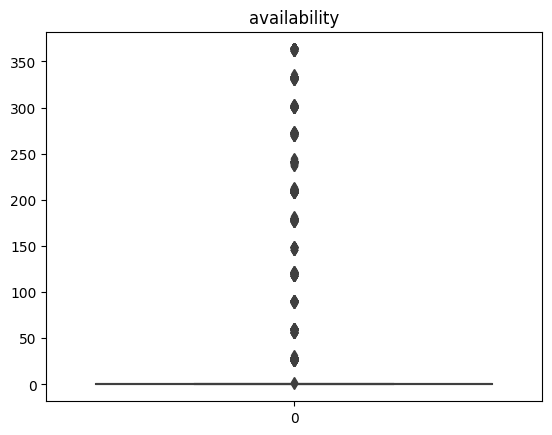

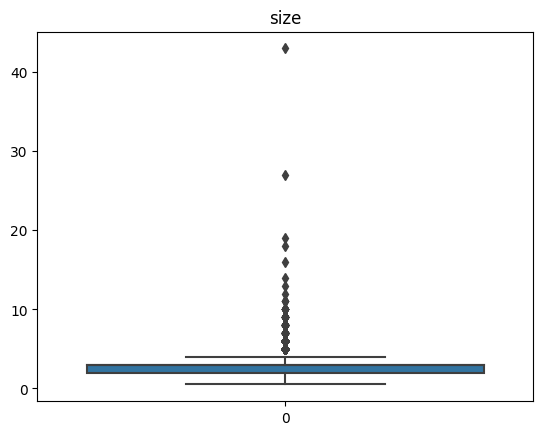

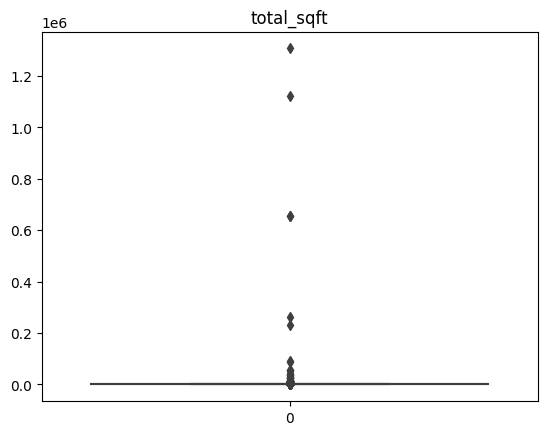

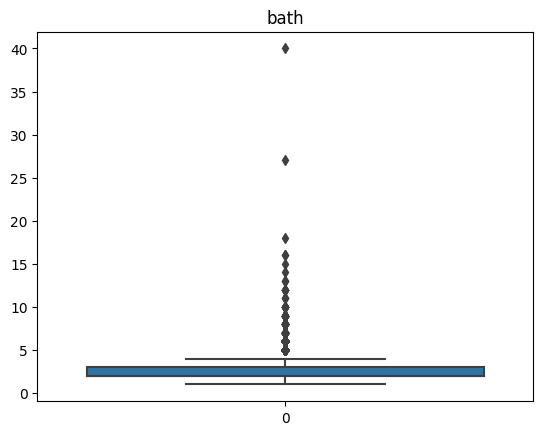

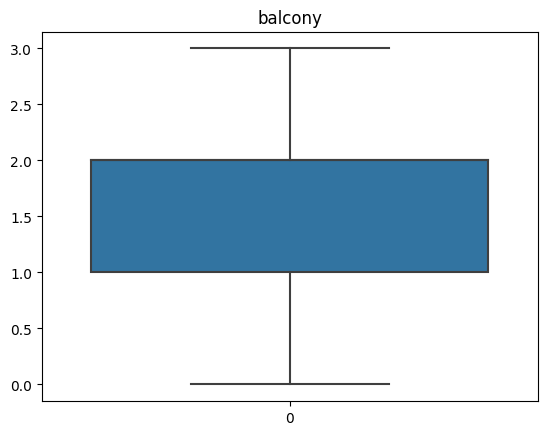

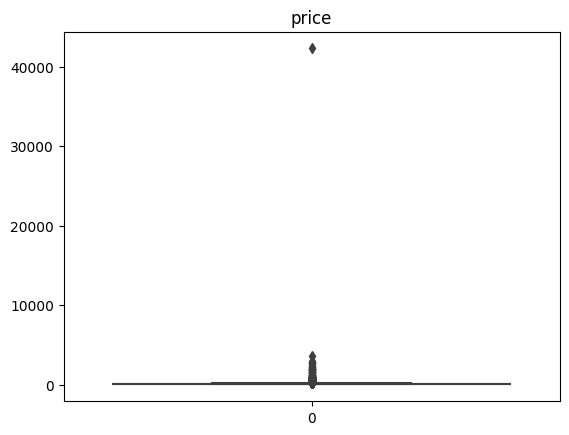

In [49]:
for i in data.select_dtypes(include="number").columns:
  plt.title(i)
  sns.boxplot(data[i])
  plt.show()
  print("\n")


Except "Balcony" column all other columns has outliers.

##### Price

<Axes: xlabel='price', ylabel='Count'>

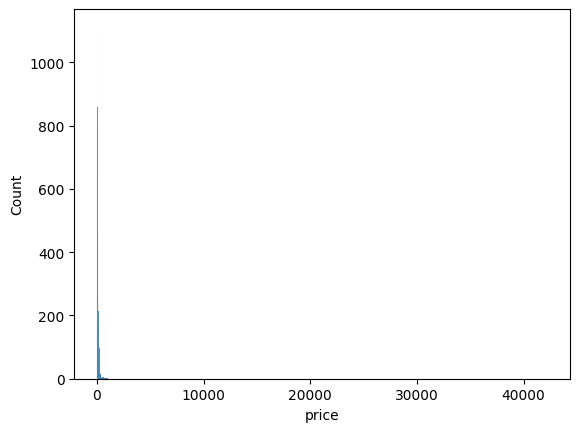

In [50]:
sns.histplot(data["price"])

In [51]:
data[data["price"]>5000]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1311,Super built-up Area,0,D Souza Layout,3.0,Niateki,4634.0,4.0,3.0,42278.0


This row has price of 42278 which is a outlier.

It changes the whole distribution.

So this data is removed.

In [52]:
data.drop(1311,inplace=True)
data[data["price"]>5000]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


<Axes: xlabel='price', ylabel='Count'>

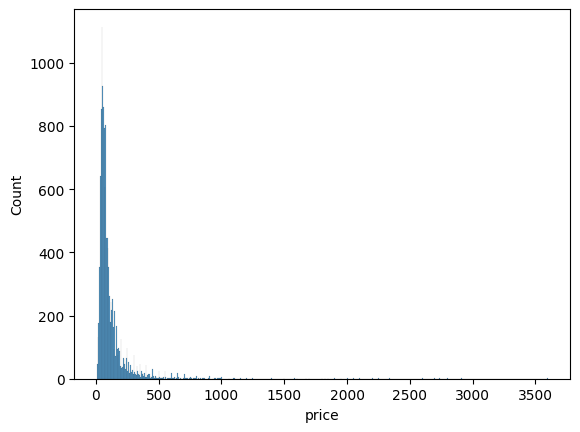

In [53]:
sns.histplot(data["price"])

<Axes: >

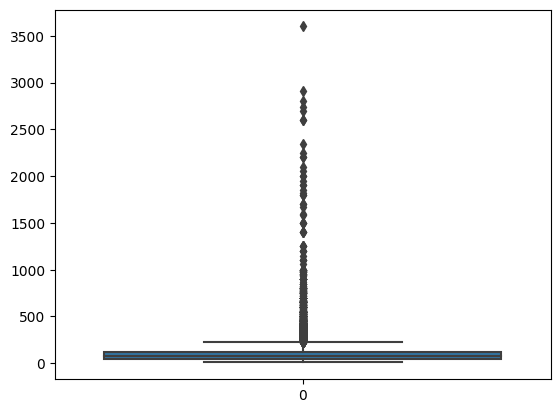

In [54]:
sns.boxplot(data["price"])

In [55]:
data[data["price"]>1000].shape

(44, 9)

In [56]:
data[data["price"]>500].shape

(240, 9)

Only 240 rows are having prices above 500.

These can be capped or removed.

Based on the other columns distribution, the decision can be made.

##### Size

<Axes: >

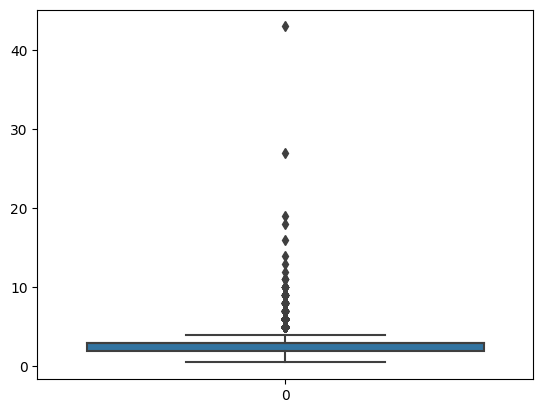

In [57]:
sns.boxplot(data["size"])

<Axes: xlabel='size', ylabel='Count'>

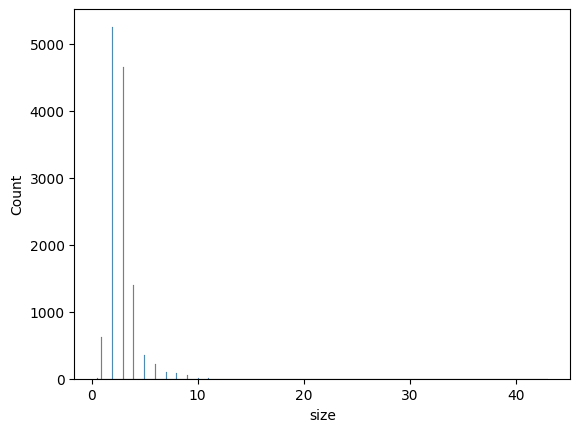

In [58]:
sns.histplot(data["size"])

In [59]:
data[data["size"]>10]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
459,Super built-up Area,0,1 Giri Nagar,11.0,Bancyri,5000.0,9.0,3.0,360.0
1718,Super built-up Area,0,2Electronic City Phase II,27.0,NaN,8000.0,27.0,0.0,230.0
1768,Plot Area,0,1 Ramamurthy Nagar,11.0,NaN,1200.0,11.0,0.0,170.0
3379,Super built-up Area,0,1Hanuman Nagar,19.0,NaN,2000.0,16.0,NaN,490.0
3609,Super built-up Area,0,Koramangala Industrial Layout,16.0,NaN,10000.0,16.0,NaN,550.0
3853,Plot Area,0,1 Annasandrapalya,11.0,NaN,1200.0,6.0,3.0,150.0
4684,Plot Area,0,Munnekollal,43.0,NaN,2400.0,40.0,0.0,660.0
4916,Super built-up Area,0,1Channasandra,14.0,NaN,1250.0,15.0,0.0,125.0
6533,Plot Area,0,Mysore Road,12.0,NaN,2232.0,6.0,2.0,300.0
7979,Super built-up Area,0,1 Immadihalli,11.0,NaN,6000.0,12.0,NaN,150.0


In [60]:
data[(data["size"]>5)& (data["size"]<10)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
9,Plot Area,0,Gandhi Bazar,6.0,NaN,1020.0,6.0,NaN,370.0
45,Plot Area,0,HSR Layout,8.0,NaN,600.0,9.0,NaN,200.0
58,Plot Area,0,Murugeshpalya,6.0,NaN,1407.0,4.0,1.0,150.0
64,Built-up Area,0,Bommanahalli,8.0,NaN,3000.0,8.0,0.0,140.0
68,Plot Area,0,Devarachikkanahalli,8.0,NaN,1350.0,7.0,0.0,85.0
...,...,...,...,...,...,...,...,...,...
13219,Plot Area,0,Laggere,7.0,NaN,1590.0,9.0,3.0,132.0
13221,Plot Area,0,T Dasarahalli,9.0,NaN,1178.0,9.0,1.0,75.0
13226,Built-up Area,0,Raja Rajeshwari Nagar,8.0,NaN,6000.0,8.0,3.0,215.0
13277,Plot Area,0,Kundalahalli Colony,7.0,NaN,1400.0,7.0,NaN,218.0


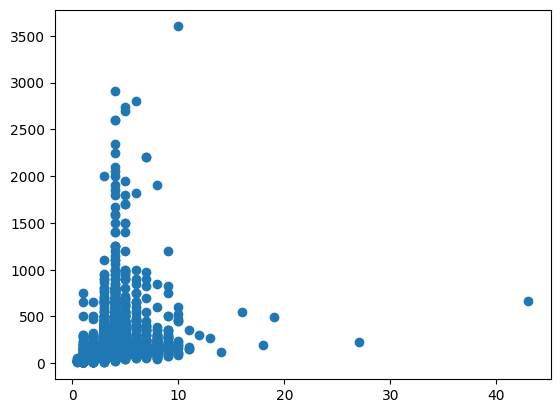

In [61]:
plt.scatter(data["size"],data["price"])

<Axes: xlabel='size', ylabel='Density'>

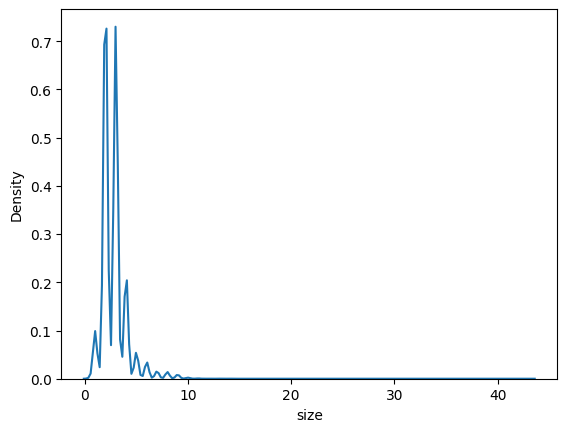

In [62]:
sns.kdeplot(data["size"])

The "size" column has few outliers.

The can be capped because the price is within the range.

In [63]:
data[data["price"]>3500]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13067,Plot Area,0,Defence Colony,10.0,NaN,7150.0,13.0,NaN,3600.0


##### Bath

<Axes: >

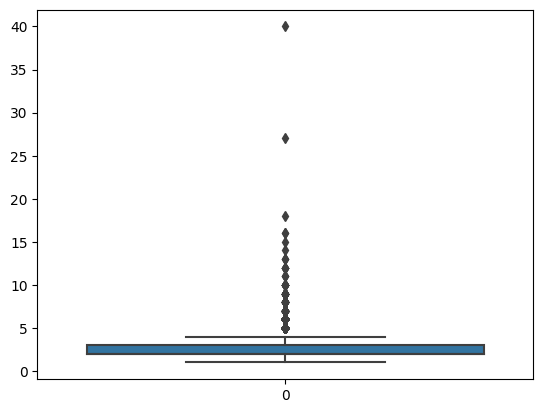

In [64]:
sns.boxplot(data["bath"])

<Axes: xlabel='bath', ylabel='Count'>

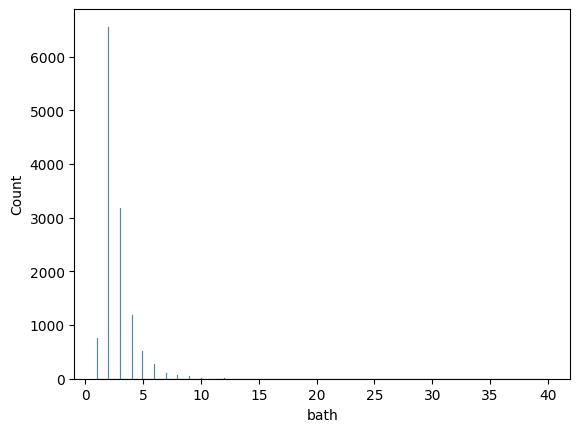

In [65]:
sns.histplot(data["bath"])

In [66]:
data[data["bath"]>5]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
9,Plot Area,0,Gandhi Bazar,6.0,NaN,1020.0,6.0,NaN,370.0
45,Plot Area,0,HSR Layout,8.0,NaN,600.0,9.0,NaN,200.0
64,Built-up Area,0,Bommanahalli,8.0,NaN,3000.0,8.0,0.0,140.0
68,Plot Area,0,Devarachikkanahalli,8.0,NaN,1350.0,7.0,0.0,85.0
79,Built-up Area,0,ISRO Layout,6.0,NaN,4400.0,6.0,3.0,250.0
...,...,...,...,...,...,...,...,...,...
13219,Plot Area,0,Laggere,7.0,NaN,1590.0,9.0,3.0,132.0
13221,Plot Area,0,T Dasarahalli,9.0,NaN,1178.0,9.0,1.0,75.0
13226,Built-up Area,0,Raja Rajeshwari Nagar,8.0,NaN,6000.0,8.0,3.0,215.0
13277,Plot Area,0,Kundalahalli Colony,7.0,NaN,1400.0,7.0,NaN,218.0


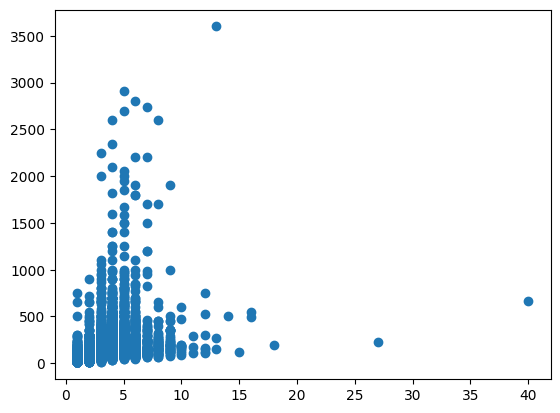

In [67]:
plt.scatter(data["bath"],data["price"])

This distribution is similar to "size" column.

these outliers also can be capped.

In [68]:
data[data["bath"]>13]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1078,Plot Area,0,BTM 1st Stage,9.0,Srvasks,3300.0,14.0,NaN,500.0
1718,Super built-up Area,0,2Electronic City Phase II,27.0,NaN,8000.0,27.0,0.0,230.0
3379,Super built-up Area,0,1Hanuman Nagar,19.0,NaN,2000.0,16.0,NaN,490.0
3609,Super built-up Area,0,Koramangala Industrial Layout,16.0,NaN,10000.0,16.0,NaN,550.0
4684,Plot Area,0,Munnekollal,43.0,NaN,2400.0,40.0,0.0,660.0
4916,Super built-up Area,0,1Channasandra,14.0,NaN,1250.0,15.0,0.0,125.0
11559,Plot Area,90,1Kasavanhalli,18.0,HMwerCo,1200.0,18.0,NaN,200.0


In [69]:
data[data["size"]>13]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1718,Super built-up Area,0,2Electronic City Phase II,27.0,NaN,8000.0,27.0,0.0,230.0
3379,Super built-up Area,0,1Hanuman Nagar,19.0,NaN,2000.0,16.0,NaN,490.0
3609,Super built-up Area,0,Koramangala Industrial Layout,16.0,NaN,10000.0,16.0,NaN,550.0
4684,Plot Area,0,Munnekollal,43.0,NaN,2400.0,40.0,0.0,660.0
4916,Super built-up Area,0,1Channasandra,14.0,NaN,1250.0,15.0,0.0,125.0
11559,Plot Area,90,1Kasavanhalli,18.0,HMwerCo,1200.0,18.0,NaN,200.0


The extreme outliers of "size" column and "bath" column are common.

There are only few rows of data with extreme outliers, so these can be removed.

##### Availability

In [70]:
data[data["availability"]>300]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
44,Super built-up Area,301,Kanakpura Road,2.0,Soazak,1330.74,2.0,2.0,91.79
71,Super built-up Area,331,Begur Road,2.0,Pruthg,1358.00,2.0,1.0,80.58
87,Super built-up Area,303,Dasanapura,2.0,Tavenew,708.00,2.0,2.0,37.00
94,Super built-up Area,334,Thanisandra,2.0,Bhmesy,1296.00,2.0,3.0,80.00
136,Super built-up Area,333,Devanahalli,2.0,Derdsig,1360.00,2.0,1.0,65.00
...,...,...,...,...,...,...,...,...,...
13121,Super built-up Area,301,Kudlu Gate,3.0,Srods P,1432.00,2.0,2.0,61.11
13145,Plot Area,364,Bommasandra,3.0,NaN,1200.00,3.0,2.0,110.00
13181,Super built-up Area,302,Bannerghatta Road,2.0,DSnjh S,1246.00,2.0,2.0,47.35
13224,Super built-up Area,333,Chandapura,1.0,SuVue S,520.00,1.0,1.0,14.04


In [71]:
data[(data["availability"]<300)& (data["availability"]>200)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,210,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.070
21,Super built-up Area,210,Binny Pete,3.0,She 2rk,1755.0,3.0,1.0,122.000
24,Super built-up Area,241,Thanisandra,0.5,Bhe 2ko,510.0,1.0,0.0,27.625
27,Built-up Area,209,Whitefield,3.0,NaN,1610.0,3.0,2.0,81.000
28,Super built-up Area,273,Ramagondanahalli,2.0,ViistLa,1151.0,2.0,2.0,48.770
...,...,...,...,...,...,...,...,...,...
13241,Super built-up Area,210,Electronic City Phase II,3.0,DSineSt,1651.0,3.0,1.0,49.530
13255,Super built-up Area,210,Marathahalli,2.0,PrensKe,1146.0,2.0,1.0,69.000
13258,Super built-up Area,210,Whitefield,1.0,Oreldhi,877.0,1.0,1.0,59.000
13259,Super built-up Area,210,Kanakapura,3.0,GoityEt,1477.0,2.0,1.0,69.500


<Axes: xlabel='availability', ylabel='Count'>

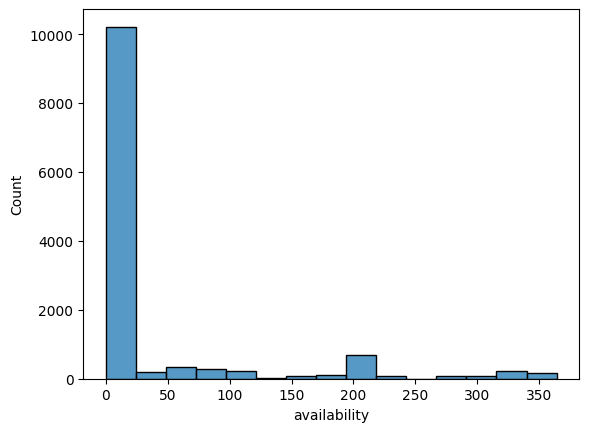

In [72]:
sns.histplot(data["availability"])

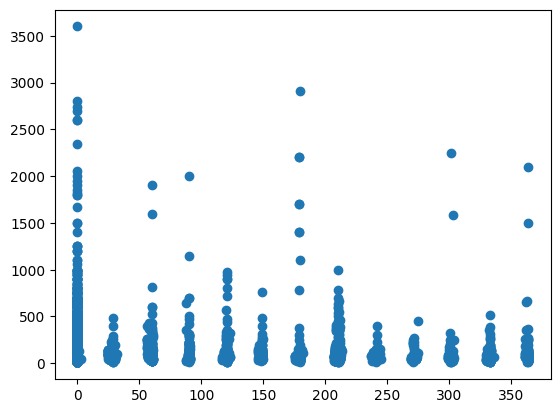

In [73]:
plt.scatter(data["availability"],data["price"])

The Distribution shows there is no correlation between availability and price.

So this column can be dropped.

##### Total sqft

<Axes: >

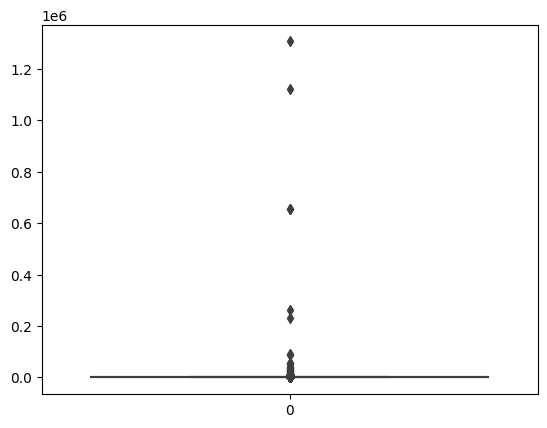

In [74]:
sns.boxplot(data["total_sqft"])

<Axes: xlabel='total_sqft', ylabel='Count'>

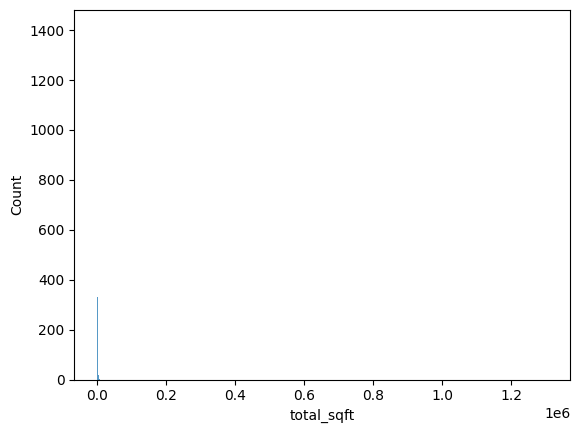

In [75]:
sns.histplot(data["total_sqft"])

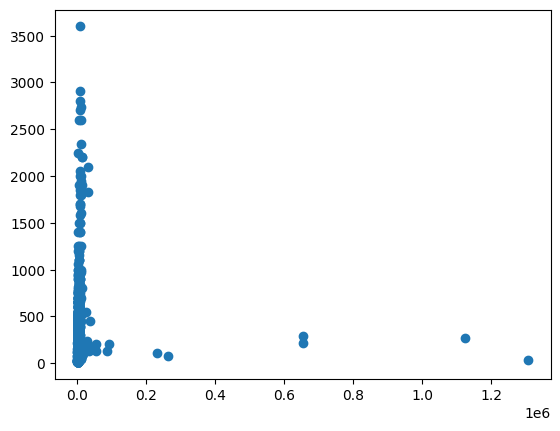

In [76]:
plt.scatter(data["total_sqft"],data["price"])

In [77]:
data[data["total_sqft"]>10000].shape

(41, 9)

In [78]:
temp=data[data["total_sqft"]<10000]

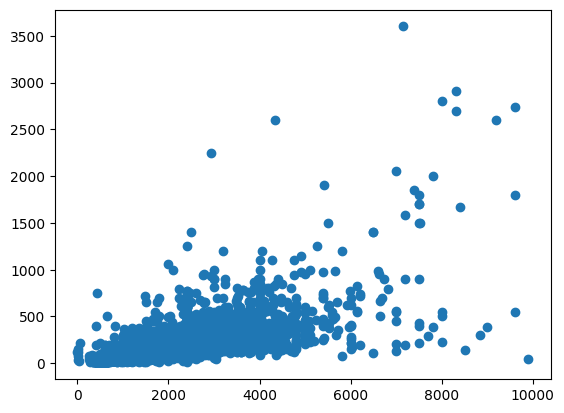

In [79]:
plt.scatter(temp["total_sqft"],temp["price"])

There are around 41 extreme outliers.

These can be removed.

##### Inference

There are extreme outliers in "price", "size", "bath", "total_sqft".
<br>"price" columns has 44 extreme outliers.
<br>"size" and "bath" both has 6 extreme outliers(combined).
<br>"total_sqft" column has 44 extreme outliers.

Total extreme outliers = 94
<br>which is 0.73% of total data, so these extreme outliers can be removed.

#### Data Cleaning

##### Removing extreme outliers

size and bath

In [80]:
data[data["size"]>13]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1718,Super built-up Area,0,2Electronic City Phase II,27.0,NaN,8000.0,27.0,0.0,230.0
3379,Super built-up Area,0,1Hanuman Nagar,19.0,NaN,2000.0,16.0,NaN,490.0
3609,Super built-up Area,0,Koramangala Industrial Layout,16.0,NaN,10000.0,16.0,NaN,550.0
4684,Plot Area,0,Munnekollal,43.0,NaN,2400.0,40.0,0.0,660.0
4916,Super built-up Area,0,1Channasandra,14.0,NaN,1250.0,15.0,0.0,125.0
11559,Plot Area,90,1Kasavanhalli,18.0,HMwerCo,1200.0,18.0,NaN,200.0


In [81]:
data.drop(data[data["size"]>13].index,inplace=True)

In [82]:
data[data["size"]>13]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


total_sqft

In [83]:
data[data["total_sqft"]>=10000].shape

(44, 9)

In [84]:
data.drop(data[data["total_sqft"]>=10000].index,inplace=True)

price

In [85]:
data[data["price"]>=1000].shape

(37, 9)

In [86]:
data.drop(data[data["price"]>=1000].index,inplace=True)

Dropping_availability

In [87]:
data.drop(columns=["availability"],inplace=True)

Capping Outliers

In [88]:
def outlier_prep(x):
  q1=data[x].quantile(0.25)
  q3=data[x].quantile(0.75)
  IQR=q3-q1
  low_range=q1-1.5*IQR
  high_range=q3+1.5*IQR
  data[x]=np.where(data[x]>high_range,high_range,data[x])
  data[x]=np.where(data[x]<low_range,low_range,data[x])

In [89]:
outlier_col=["price","size","bath","total_sqft"]
for i in outlier_col:
  outlier_prep(i)

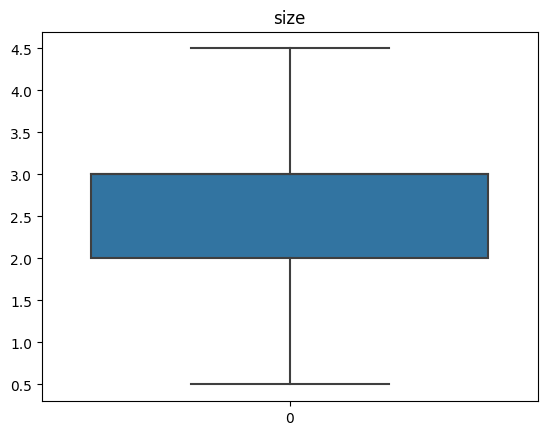

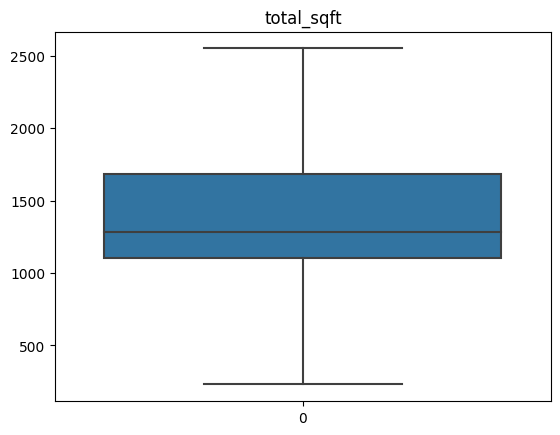

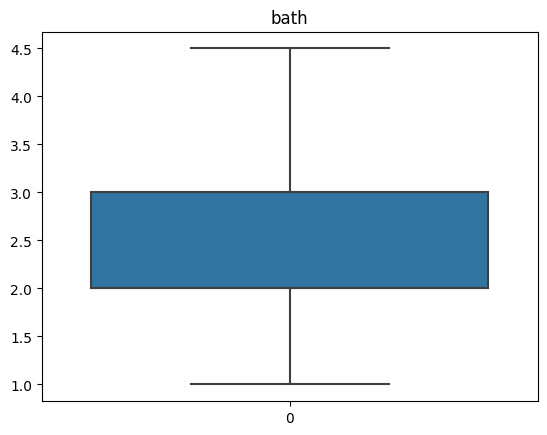

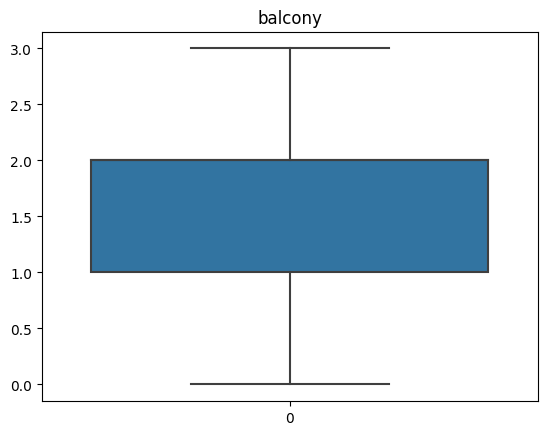

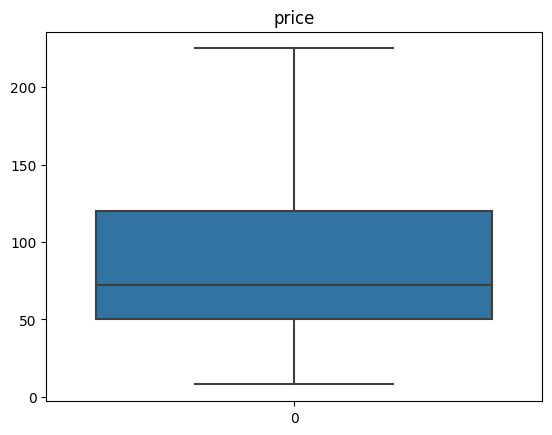

In [90]:
for i in data.select_dtypes(include="number").columns:
  plt.title(i)
  sns.boxplot(data[i])
  plt.show()
  print("\n")

Filling null values

Numerical columns with null values are size, bath, and balcony

In [91]:
def fill_n(col):
  data[col].fillna(value=data[col].median(),inplace=True)

In [92]:
fill_col=["size","bath","balcony"]
for i in fill_col:
  fill_n(i)

Few values in size and bath are in float, but the number of rooms can only be integer, except that house with 1RK is conisidered 0.5 BHK

size

In [93]:
data["size"].unique()

array([2. , 4. , 3. , 4.5, 1. , 0.5])

In [94]:
data.loc[data["size"]==4.5,"size"]=5

bath

In [95]:
data["bath"].unique()

array([2. , 4.5, 3. , 4. , 1. ])

In [96]:
data.loc[data["bath"]==4.5,"bath"]=5

In [97]:
data.isnull().sum()

area_type        0
location         1
size             0
society       5270
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

All Data preprocessing such as Data cleaning, Feature Engineering, Feature selection for Numerical columns are done. Now its time to concentrate on Categorical columns

#### Categorical columns

##### Area type

In [99]:
data.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4.0,Theanmp,2550.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00


In [100]:
data["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [101]:
data["area_type"].value_counts()

Super built-up  Area    8303
Built-up  Area          2393
Plot  Area              1938
Carpet  Area              87
Name: area_type, dtype: int64

<Axes: xlabel='area_type', ylabel='count'>

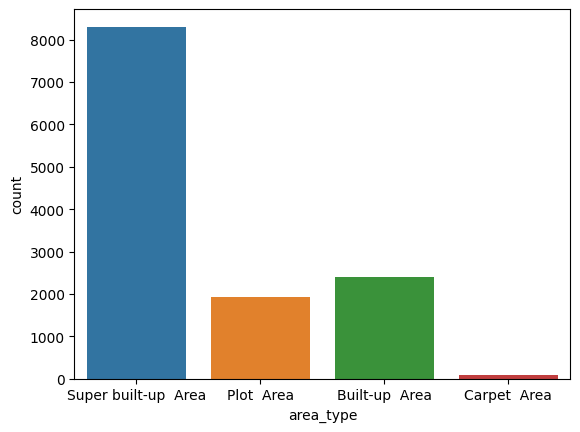

In [102]:
sns.countplot(x=data["area_type"])

The "area_type" column has only 4 categories, so this column can be one hot encoded.

##### Location

In [103]:
data["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [104]:
data["location"].nunique()

1290

There are totally 1209 locations it is not right to use one hot encoding here.

These Locations are grouped based on their mean or median price.

In [105]:
data["location"].value_counts()

Whitefield          522
Sarjapur  Road      378
Electronic City     290
Kanakpura Road      247
Thanisandra         229
                   ... 
Shirdi Sai Nagar      1
S R Layout            1
Meenakshi Layout      1
Vidyapeeta            1
Abshot Layout         1
Name: location, Length: 1290, dtype: int64

Dropping single record which has no location mentioned

In [106]:
data.dropna(subset="location",inplace=True)

Grouping based on location

In [107]:
grp=data.groupby("location")

In [108]:
grp.mean()

,size,total_sqft,bath,balcony,price
location,,,,,
Anekal,0.500000,351.000000,1.000000,1.0,16.000000
Banaswadi,0.500000,527.000000,1.000000,0.0,35.000000
Basavangudi,0.500000,670.000000,1.000000,1.0,50.000000
Bhoganhalli,0.500000,296.000000,1.000000,0.0,22.890000
Devarabeesana Halli,2.666667,1539.666667,2.666667,2.0,124.833333
...,...,...,...,...,...
t.c palya,5.000000,1350.000000,5.000000,3.0,160.000000
tc.palya,2.250000,1075.000000,2.000000,1.0,62.190000
vinayakanagar,5.000000,1200.000000,5.000000,2.0,200.000000


In [109]:
grp.median()

,size,total_sqft,bath,balcony,price
location,,,,,
Anekal,0.5,351.0,1.0,1.0,16.00
Banaswadi,0.5,527.0,1.0,0.0,35.00
Basavangudi,0.5,670.0,1.0,1.0,50.00
Bhoganhalli,0.5,296.0,1.0,0.0,22.89
Devarabeesana Halli,3.0,1671.0,3.0,2.0,149.50
...,...,...,...,...,...
t.c palya,5.0,1350.0,5.0,3.0,160.00
tc.palya,2.0,1010.0,2.0,1.0,58.50
vinayakanagar,5.0,1200.0,5.0,2.0,200.00


In [110]:
grp.mean()["price"].min()

15.0

In [111]:
grp.mean()["price"].max()

225.0

In [112]:
grp.median()["price"].min()

15.0

In [113]:
grp.median()["price"].max()

225.0

Mean and Median values are very simialr.

Based on median price, the locations are categorized.


In [114]:
q1_loc=grp.median()["price"].quantile(0.25)
q1_loc

56.03

In [115]:
q2_loc=grp.median()["price"].quantile(0.50)
q2_loc

80.0

In [116]:
q3_loc=grp.median()["price"].quantile(0.75)
q3_loc

140.0

In [117]:
q4_loc=grp.median()["price"].quantile(1)
q4_loc

225.0

In [118]:
grp.median()[((grp.median()["price"]>=q1_loc) & (grp.median()["price"]<q2_loc))].reset_index()

,location,size,total_sqft,bath,balcony,price
0,1st Stage Domlur,3.0,1350.0,2.0,2.0,65.00
1,1st Stage Indira Nagar,2.0,1400.0,2.0,1.0,67.00
2,3rd Phase Iti Layout,2.0,1145.0,2.0,1.0,63.00
3,3rd Stage Raja Rajeshwari Nagar,2.0,1300.0,3.0,1.0,65.00
4,5th Phase JP Nagar,2.0,1220.0,2.0,2.0,65.00
...,...,...,...,...,...,...
296,manyata park,2.5,1551.0,2.5,1.0,73.41
297,mvj engineering college,3.0,1200.0,3.0,1.0,56.53
298,"ravindra nagar, T.dasarahalli peenya",2.0,1180.0,2.0,2.0,74.00
299,rr nagar,2.0,1400.0,2.0,2.0,60.00


In [119]:
q1_location=grp.median()[(grp.median()["price"]<q1_loc)].reset_index()["location"]

In [120]:
q2_location=grp.median()[((grp.median()["price"]>=q1_loc) & (grp.median()["price"]<q2_loc))].reset_index()["location"]

In [121]:
q3_location=grp.median()[((grp.median()["price"]>=q2_loc) & (grp.median()["price"]<q3_loc))].reset_index()["location"]

In [122]:
q4_location=grp.median()[(grp.median()["price"]>=q3_loc)].reset_index()["location"]

In [123]:
set(q1_location).intersection(set(q2_location))

set()

##### Society

In [124]:
data["society"].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [125]:
data["society"].nunique()

2680

Filling null value with "No_Society"

In [126]:
data.loc[data["society"].isna(),"society"]="No_Society"

Grouping based on Society

In [127]:
grp_society=data.groupby("society")

In [128]:
q1_soc=grp_society.median()["price"].quantile(0.25)
q1_soc

50.0

In [129]:
q2_soc=grp_society.median()["price"].quantile(0.50)
q2_soc

68.0

In [130]:
q3_soc=grp_society.median()["price"].quantile(0.75)
q3_soc

100.0

In [131]:
q4_soc=grp_society.median()["price"].quantile(1)
q4_soc

225.0

Grouping based on median values

In [132]:
q1_society=grp_society.median()[(grp_society.median()["price"]<q1_soc)].reset_index()["society"]

In [133]:
q2_society=grp_society.median()[((grp_society.median()["price"]>=q1_soc) & (grp_society.median()["price"]<q2_soc))].reset_index()["society"]

In [134]:
q3_society=grp_society.median()[((grp_society.median()["price"]>=q2_soc) & (grp_society.median()["price"]<q3_soc))].reset_index()["society"]

In [135]:
q4_society=grp_society.median()[(grp_society.median()["price"]>=q3_soc)].reset_index()["society"]

In [136]:
set(q1_society).intersection(set(q2_society))

set()

#### Encoding

Location with median price higher than q3 is tier-1, so value 4 is given, similarly for tier-2, tier-3, tier-4 locations are given values 3,2,1 respectively

In [137]:
def enc_loc(inp):
  if inp in q1_location.values:
    loc=1
  elif inp in q2_location.values:
    loc=2
  elif inp in q3_location.values:
    loc=3
  else:
    loc=4
  return loc

In [138]:
data["location"]=data["location"].apply(enc_loc)

In [139]:
data["location"].unique()

array([1, 3, 2, 4])

In [140]:
def enc_society(inp):
  if inp in q1_society.values:
    soc=1
  elif inp in q2_society.values:
    soc=2
  elif inp in q3_society.values:
    soc=3
  else:
    soc=4
  return soc

In [141]:
data["society"]=data["society"].apply(enc_society)
data["society"].unique()

array([2, 4, 3, 1])

In [142]:
data.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,1,2.0,2,1056.0,2.0,1.0,39.07
1,Plot Area,3,4.0,4,2550.0,5.0,3.0,120.00
2,Built-up Area,1,3.0,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,3,3.0,4,1521.0,3.0,1.0,95.00
4,Super built-up Area,2,2.0,3,1200.0,2.0,1.0,51.00


<Axes: xlabel='area_type', ylabel='price'>

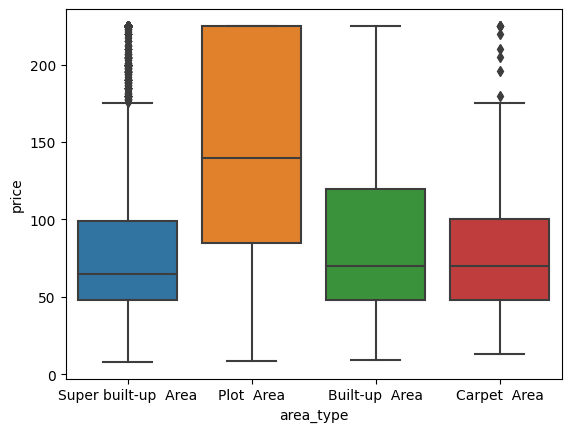

In [143]:
sns.boxplot(x=data["area_type"],y=data["price"])

In [144]:
data_for_model=pd.get_dummies(data,drop_first=True)

In [145]:
data_for_model.head()

,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,1,2.0,2,1056.0,2.0,1.0,39.07,0,0,1
1,3,4.0,4,2550.0,5.0,3.0,120.00,0,1,0
2,1,3.0,3,1440.0,2.0,3.0,62.00,0,0,0
3,3,3.0,4,1521.0,3.0,1.0,95.00,0,0,1
4,2,2.0,3,1200.0,2.0,1.0,51.00,0,0,1


<Axes: >

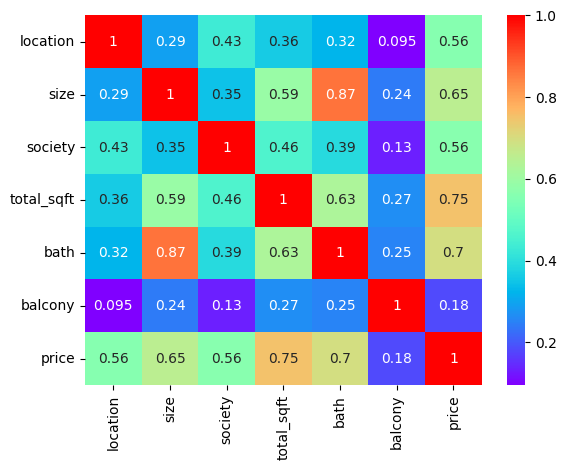

In [146]:
sns.heatmap(data.corr(),annot=True,cmap="rainbow")

### Data Splitting

In [147]:
X=data_for_model.drop(columns=["price"])
y=data_for_model[["price"]]

In [148]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

Transform

In [149]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [150]:
X_train=scaler.fit_transform(X_train)
#X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

### Model building

In [151]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

In [152]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [153]:
lr_model.score(X_train,y_train)

0.7663829586236108

In [154]:
X_val,X_Test,y_val,y_Test=train_test_split(X_test,y_test,test_size=0.5,random_state=100)

X_val=scaler.transform(X_val)
X_Test=scaler.transform(X_Test)

In [155]:
from sklearn.svm import LinearSVR
svm_lin_model=LinearSVR()

In [156]:
svm_lin_model.fit(X_train,y_train)

LinearSVR()

In [157]:
svm_lin_model.score(X_train,y_train)

0.7587784688949601

In [158]:
svm_lin_model.score(X_val,y_val)

-6.455948341489786

In [159]:
from sklearn.svm import SVR
svm_poly2_model=SVR(kernel="poly",degree=2)

In [160]:
svm_poly2_model.fit(X_train,y_train)

SVR(degree=2, kernel='poly')

In [161]:
svm_poly2_model.score(X_train,y_train)

0.49540259011650456

In [162]:
svm_poly2_model.score(X_val,y_val)

-25.90481557629938

In [163]:
from sklearn.svm import SVR
svm_poly3_model=SVR(kernel="poly",degree=3)

In [164]:
svm_poly3_model.fit(X_train,y_train)

SVR(kernel='poly')

In [165]:
svm_poly3_model.score(X_train,y_train)

0.767002734189046

In [166]:
svm_poly3_model.score(X_val,y_val)

-1439.5198637812575

In [167]:
from sklearn.svm import SVR
svm_rbf_model=SVR(kernel="rbf")

In [168]:
svm_rbf_model.fit(X_train,y_train)

SVR()

In [169]:
svm_rbf_model.score(X_train,y_train)

0.7915711689198971

In [170]:
svm_rbf_model.score(X_val,y_val)

-0.23211243007497018

In [171]:
from sklearn.svm import SVR
svm_rbfe3_model=SVR(kernel="rbf",epsilon=0.3)

In [172]:
svm_rbfe3_model.fit(X_train,y_train)

SVR(epsilon=0.3)

In [173]:
svm_rbfe3_model.score(X_train,y_train)

0.7914634896069344

In [174]:
svm_rbfe3_model.score(X_val,y_val)

-0.23158399273821484

In [175]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()

In [176]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [177]:
dt_model.score(X_train,y_train)

0.9608074813784987

In [178]:
dt_model.score(X_val,y_val)

-1.4246522333706597

In [179]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [180]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [181]:
param_distributions={"max_depth":[5,10,20],"min_samples_split":[3,5,10,20],"min_samples_leaf":[1,3,4]}

In [182]:
from sklearn.model_selection import GridSearchCV
dt_gr=GridSearchCV(estimator=dt_model,param_grid=param_distributions,cv=5)

In [183]:
dt_gr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [3, 5, 10, 20]})

In [184]:
dt_gr.best_params_

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 20}

In [185]:
dt_gr.score(X_train,y_train)

0.854896991889187

In [186]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()

In [187]:
param_distributions={"n_estimators":[25,50,75,100],"max_depth":[5,10,20],"min_samples_split":[3,5,10,20],"min_samples_leaf":[1,3,4]}

In [188]:
rf_gr=GridSearchCV(estimator=rf_model,param_grid=param_distributions,cv=5)

In [189]:
rf_gr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [3, 5, 10, 20],
                         'n_estimators': [25, 50, 75, 100]})

In [190]:
rf_gr.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'n_estimators': 100}

In [191]:
rf_gr.score(X_train,y_train)

0.8808677827701779

In [192]:
from sklearn.ensemble import GradientBoostingRegressor
gd_model=GradientBoostingRegressor()

In [193]:
gd_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [194]:
gd_model.score(X_train,y_train)

0.8369117831288096

In [195]:
param_distributions={"n_estimators":[25,50,75,100],"max_depth":[5,10,20],"min_samples_leaf":[1,3,4]}
gd_gr=GridSearchCV(estimator=gd_model,param_grid=param_distributions,cv=5)

In [196]:
gd_gr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 3, 4],
                         'n_estimators': [25, 50, 75, 100]})

In [197]:
gd_gr.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 50}

In [198]:
gd_gr.score(X_train,y_train)

0.8532057464516535

In [199]:
from xgboost import XGBRegressor
xg_model=XGBRegressor()

In [200]:
xg_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [201]:
xg_model.score(X_train,y_train)

0.9063633698353869

In [202]:
param_distributions = {'n_estimators': [100, 200, 300],'learning_rate': [0.05, 0.1, 0.2],'max_depth': [3, 5, 7]}

In [203]:
xg_gr=GridSearchCV(estimator=xg_model,param_grid=param_distributions,cv=5)

In [204]:
xg_gr.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [205]:
xg_gr.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}

In [206]:
xg_gr.score(X_train,y_train)

0.8523452610889029

### Model Evaluation

Linear Regression

In [207]:
lr_model.score(X_test,y_test)

0.7844335490909871

SVM

In [208]:
svm_rbf_model.score(X_Test,y_Test)

-0.22162611414167488

Decision Tree

In [209]:
dt_gr.score(X_test,y_test)

0.8203765307384097

Random Forest

In [210]:
rf_gr.score(X_test,y_test)

0.8446545734782674

Gradient Boost

In [211]:
gd_gr.score(X_test,y_test)

0.8481579411887148

XGBoost

In [212]:
xg_gr.score(X_test,y_test)

0.8478318371991671